In [1]:
%matplotlib inline
# File formats
import ROOT
import uproot, h5py, pickle
# Data manipulation
import datetime as dt
import numpy as np
import pandas as pd
# Plotting
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
# Others
from tqdm.notebook import tqdm
import sys, importlib
from importlib import reload
from pathlib import Path
# Personal
import hepkit.hepData as hd
import hepkit.hepIO as hio
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
# Colors
mc = [
    [35/255,55/255,59/255],
    [237/255,138/255,46/255],
    [131/255,40/255,0/255],
    [0/255,123/255,68/255],
    [107/255,60/255,79/255],
    [118/255,93/255,68/255],
    [62/255,79/255,51/255],
    [147/255,161/255,161/255]
]


# Add current directory to import path and import locals
pathFromHere = Path("__file__").parent.absolute()
sys.path.insert(1, pathFromHere)
import Libraries.charge_library as cl
import Libraries.light_library as ll
import Libraries.meta_library as ml
import Libraries.evd_library as evd
import Libraries.michelCandidate_class as mic
import Libraries.betheBloch_library as bbl

hf.DefaultSetup()

Welcome to JupyROOT 6.22/08


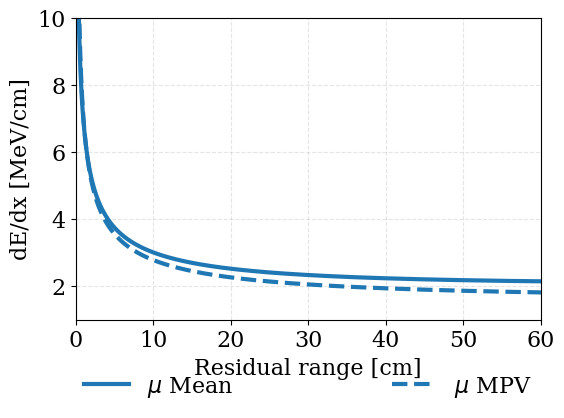

In [2]:
reload(bbl)
mean_dist, mean_dedx, mpv_dist, mpv_dedx = bbl.ResRange(105.65)

plt.figure(figsize=(6,4),facecolor='white',dpi=100)
plt.plot(mean_dist,mean_dedx,color='C0',lw=3,label='$\mu$ Mean')
plt.plot(mpv_dist,mpv_dedx,color='C0',ls='--',lw=3,label='$\mu$ MPV')
plt.grid(ls='--',color='gray',alpha=0.2)
plt.xlim(0.1,60)
plt.ylim(1,10)
plt.xlabel('Residual range [cm]')
plt.ylabel('dE/dx [MeV/cm]')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.show()

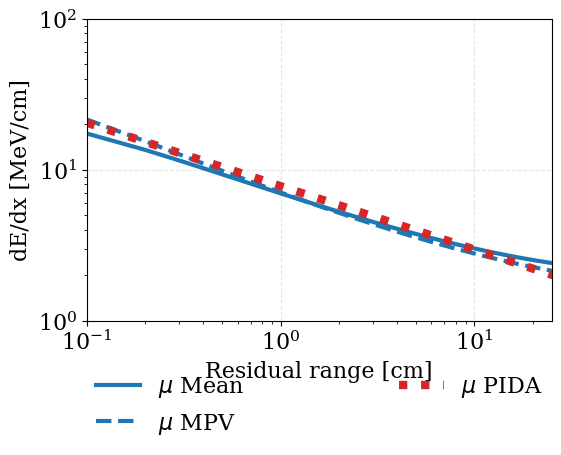

In [27]:
reload(bbl)
mean_dist, mean_dedx, mpv_dist, mpv_dedx = bbl.ResRange(105.65)

xs = np.logspace(-1,2,500)
stupid_dedx = 7.8*np.power(xs,-0.42)

plt.figure(figsize=(6,4),facecolor='white',dpi=100)
plt.plot(mean_dist,mean_dedx,color='C0',lw=3,label='$\mu$ Mean')
plt.plot(mpv_dist,mpv_dedx,color='C0',ls='--',lw=3,label='$\mu$ MPV')
plt.plot(xs,stupid_dedx,color='C3',ls=':',lw=6,label='$\mu$ PIDA')
plt.grid(ls='--',color='gray',alpha=0.2)
plt.xlim(0.1,25)
plt.ylim(1,100)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Residual range [cm]')
plt.ylabel('dE/dx [MeV/cm]')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.show()

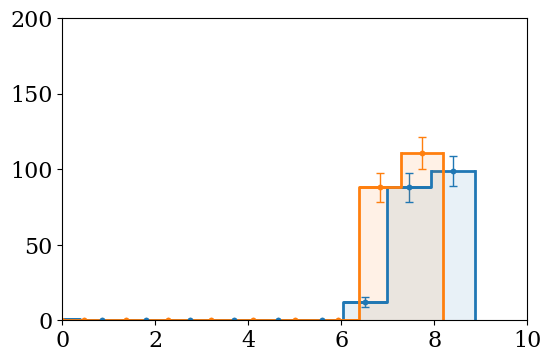

In [35]:
mean_pida = [mean_dedx[m]*np.power(mean_dist[m],0.42) if mean_dist[m]<20 else -10 for m in range(len(mean_dedx))]
mpv_pida = [mpv_dedx[m]*np.power(mpv_dist[m],0.42) if mpv_dist[m]<20 else -10 for m in range(len(mpv_dedx))]


plt.figure(figsize=(6,4),facecolor='white',dpi=100)
hp.HepHist(mean_pida,color='C0')
hp.HepHist(mpv_pida,color='C1')
plt.ylim(0,200)
plt.xlim(0,10)
plt.show()